In [ ]:
!pip install -U "tensorflow>=2.10.0"
!pip install matplotlib
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 35.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.7 requires jax>=0.4.6, but you have jax 0.3.25 which is incompatible.
flax 0.6.9 requires jax>=0.4.2, but you have jax 0.3.25 which is incompatible.
orbax-checkpoint 0.2.1 requires jax>=0.4.8, but you have jax 0.3.25 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
import tqdm
import random
import pathlib
import itertools
import collections

import os
import cv2
import numpy as np

# Some modules to display an animation using imageio.
import imageio
from IPython import display
from urllib import request

import glob
import imageio
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display


In [ ]:
!pip install -q imageio
!pip install -q opencv-python
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [ ]:
# TensorFlow and TF-Hub modules.
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed

logging.set_verbosity(logging.ERROR)

# Some modules to help with reading the UCF101 dataset.
import random
import re
import os
import tempfile
import ssl
import cv2
import numpy as np

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Set image dimensions
IMG_WIDTH = 128
IMG_HEIGHT = 128

# Define the directory where the videos are stored
videos_directory = '/content/drive/MyDrive/combined_folders'

# Define the directory where the frames will be stored
frames_directory = '/content/drive/MyDrive/combined_folders_frames_preprocesses_new'

# Loop through all the videos in the directory
for folder in os.listdir(videos_directory):
    folder_path = os.path.join(videos_directory, folder)
    if os.path.isdir(folder_path):
        for video in os.listdir(folder_path):
            video_path = os.path.join(folder_path, video)

            # Create a new directory for the frames of the current video
            frames_folder = os.path.join(frames_directory, folder, video[:-4])
            os.makedirs(frames_folder, exist_ok=True)

            # Open the video file and extract the frames
            cap = cv2.VideoCapture(video_path)
            frame_count = 0
            while True:
                ret, frame = cap.read()
                if not ret:
                    break
                cv2.imwrite(os.path.join(frames_folder, f"frame{frame_count}.jpg"), frame)
                frame_count += 1

            # Release the video file
            cap.release()

            # Create a list to store the preprocessed frames
            preprocessed_frames = []

            # Loop through each frame and preprocess it
            for i in range(frame_count):
                # Load the image
                img_path = os.path.join(frames_folder, f"frame{i}.jpg")
                img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))

                # Convert the image to an array
                img_array = img_to_array(img)

                # Normalize the pixel values to the range [-1, 1]
                img_array = (img_array - 127.5) / 127.5

                # Add the preprocessed image to the list
                preprocessed_frames.append(img_array)

            # Convert the list to a NumPy array
            preprocessed_frames = np.array(preprocessed_frames)

            # Reshape the array to add a channel dimension
            preprocessed_frames = np.reshape(preprocessed_frames, (-1, IMG_HEIGHT, IMG_WIDTH, 1))

            # Save the preprocessed frames to a file
            np.save(os.path.join(frames_folder, 'preprocessed_frames.npy'), preprocessed_frames)


KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
BUFFER_SIZE = 100
BATCH_SIZE = 1

In [ ]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, Activation, Lambda, Input
from tensorflow.keras.models import Model

In [ ]:
import cv2
import os
import numpy as np
import tensorflow as tf

# Define the directory where the preprocessed images are stored
preprocessed_images_dir = '/content/drive/MyDrive/combined_folders_frames_preprocesses_new'

# Load the preprocessed images and organize them by video
dataset = {}
for root, dirs, files in os.walk(preprocessed_images_dir):
    for file in files:
        if file.endswith('.jpg'):  # Assuming frames are saved as JPG images
            file_path = os.path.join(root, file)
            video_name = os.path.basename(root)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

            if video_name not in dataset:
                dataset[video_name] = []
            dataset[video_name].append(img)

# Define the target image shape
target_shape = (128, 128)

# Determine the number of frames in the sequence
num_frames = 3  

# Resize, pad, and normalize the images
normalized_dataset = []
for video_name, frames in dataset.items():
    resized_frames = []
    for img in frames:
        resized_img = cv2.resize(img, target_shape[::-1], interpolation=cv2.INTER_LINEAR)
        resized_img = np.expand_dims(resized_img, axis=-1)
        resized_img = resized_img.astype(np.float32) / 255.0 * 2 - 1
        resized_frames.append(resized_img)

    if len(resized_frames) >= num_frames:
        normalized_dataset.extend(resized_frames)

# Convert the dataset to NumPy array
normalized_dataset = np.array(normalized_dataset)



In [ ]:
# Create the input frames and target frames datasets
input_frames = []
target_frames = []
for i in range(len(normalized_dataset) - num_frames):
    input_frame = normalized_dataset[i]
    target_sequence = normalized_dataset[i+1:i+num_frames]

    input_frames.append(input_frame)
    target_frames.append(target_sequence)

# Convert the input and target frames datasets to NumPy arrays
input_frames = np.array(input_frames)
target_frames = np.array(target_frames)
num_samples = len(normalized_dataset)

batch_size=16

input_dataset = tf.data.Dataset.from_tensor_slices(input_frames)
target_dataset = tf.data.Dataset.from_tensor_slices(target_frames)

train_dataset = tf.data.Dataset.zip((input_dataset, target_dataset)).batch(batch_size)

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(input_frames) // num_frames):
    plt.imshow(np.hstack(input_frames[i*num_frames:(i+1)*num_frames]))
    plt.show()

In [ ]:
def make_generator_model(num_frames, output_resolution):
  """Creates a generator model."""
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Dense(128 * 128, input_shape=(100,)))
  model.add(tf.keras.layers.Reshape((128, 128, 1)))

  for i in range(num_frames - 1):
    model.add(tf.keras.layers.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'))

  model.add(tf.keras.layers.Conv2D(
      filters=1,
      kernel_size=(3, 3),
      strides=(1, 1),
      padding='same',
      activation='sigmoid'))

  return model

In [ ]:
def make_discriminator_model():
  """Creates a discriminator model."""
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Conv2D(
      filters=128,
      kernel_size=(3, 3),
      strides=(1, 1),
      padding='same',
      input_shape=(128, 128, 1)))
  model.add(tf.keras.layers.LeakyReLU(alpha=0.2))

  model.add(tf.keras.layers.Conv2D(
      filters=256,
      kernel_size=(3, 3),
      strides=(2, 2),
      padding='same'))
  model.add(tf.keras.layers.LeakyReLU(alpha=0.2))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  return model

In [ ]:
for i in range(3):
  noise = np.random.randint(0, 255, (128, 128, 3), dtype=np.uint8)
  plt.imsave('frame{:02d}.png'.format(i), noise)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def create_frame(i):
    """Creates a frame of RGB noise."""
    noise = np.random.randint(0, 255, (128, 128, 3), dtype=np.uint8)
    plt.imsave('frame{:02d}.png'.format(i), noise)

def generate_frames(generator, noise, num_frames):
    """Generates a sequence of future frames."""
    generated_frames = []

    for i in range(num_frames):
        generated_frame = generator(noise, training=False)
        generated_frames.append(generated_frame)

    return generated_frames
def main():
    # Load the input frames.
    input_frames = []

    for i in range(3):
        input_frame = plt.imread('frame{:02d}.png'.format(i))
        input_frames.append(input_frame)

    # Create the generator and discriminator models.
    generator = make_generator_model(num_frames=3, output_resolution=128)
    discriminator = make_discriminator_model()

    # Generate the future frames.
    noise = tf.random.normal([len(input_frames), 100])
    generated_frames = generate_frames(generator, noise, num_frames=3)

    # Plot the generated frames.
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))

    for i in range(3):
        generated_frame = generated_frames[i]
        reshaped_frame = np.squeeze(generated_frame.numpy(), axis=0)
        axes[i].imshow(reshaped_frame)
        axes[i].axis('off')

    plt.show()


In [ ]:
generator = make_generator_model(num_frames=3, output_resolution=128)
discriminator = make_discriminator_model()

In [ ]:
from tensorflow.keras.layers import Input, Dense, Reshape

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(real_output), real_output)
    fake_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss


In [ ]:
def generator_loss(fake_output):
    return tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(fake_output), fake_output)


In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator = make_generator_model(num_frames=3, output_resolution=128),
                                 discriminator=make_discriminator_model())

In [ ]:
def next_frame_loss_function(real_frame, predicted_frame):
    return tf.reduce_mean(tf.square(real_frame - predicted_frame))

In [ ]:
EPOCHS = 5
BATCH_SIZE = 1  
noise_dim = 100
num_examples_to_generate = 3  # Number of frames to generate
latent_dim=100

In [ ]:
@tf.function
def train_step(images):
    # Generate noise
    noise = tf.random.normal([BATCH_SIZE, latent_dim])

    # Generate frames
    generated_frames = generator(noise, training=True)

    # Get discriminator predictions
    real_output = make_discriminator_model(images, training=True)
    fake_output = make_discriminator_model(generated_frames, training=True)

    # Calculate losses
    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

    # Compute gradients
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, make_discriminator_model.trainable_variables)

    # Apply gradients
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, make_discriminator_model.trainable_variables))


In [ ]:

def generate_and_save_images(model, epoch, test_input, num_images):
    # Notice `training` is set to False.
    # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, num_images, i * num_images + 1)
        plt.imshow(predictions[i, 0, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

        for j in range(1, num_images):
            plt.subplot(4, num_images, i * num_images + j + 1)
            plt.imshow(predictions[i, j, :, :, 0] * 127.5 + 127.5, cmap='gray')
            plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [ ]:
import numpy as np

def train(dataset, epochs):
    for epoch in range(epochs):
        for input_frames, target_frame in dataset:
            with tf.GradientTape() as gen_tape:
                # Generate noise for each frame
                noise = tf.random.normal([BATCH_SIZE, latent_dim])

                # Generate a single frame
                generated_frame = generator(noise, training=True)

                # Calculate the generator loss for predicting the next frame
                next_frame_loss = next_frame_loss_function(target_frame, generated_frame)

            gradients_of_generator = gen_tape.gradient(next_frame_loss, generator.trainable_variables)
            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

            # Print the loss for monitoring the training progress
            print(f"Epoch {epoch+1}/{epochs}, Loss: {next_frame_loss}")


In [ ]:
shapes = [img.shape for img in normalized_dataset]
print(shapes)

[(128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128, 1), (128, 128

In [ ]:
normalized_dataset.shape

(6645, 128, 128, 1)

In [ ]:
LATENT_DIMENSION = 100

In [ ]:
train(train_dataset, EPOCHS)


Epoch 1/5, Loss: 0.552260160446167
Epoch 1/5, Loss: 0.4949014186859131
Epoch 1/5, Loss: 0.4561461806297302
Epoch 1/5, Loss: 0.33109670877456665
Epoch 1/5, Loss: 0.44517800211906433
Epoch 1/5, Loss: 0.5122572183609009
Epoch 1/5, Loss: 0.29585880041122437
Epoch 1/5, Loss: 0.8306846022605896
Epoch 1/5, Loss: 1.205580711364746
Epoch 1/5, Loss: 1.2123552560806274
Epoch 1/5, Loss: 0.831575334072113
Epoch 1/5, Loss: 0.42725276947021484
Epoch 1/5, Loss: 0.45317739248275757
Epoch 1/5, Loss: 0.42223089933395386
Epoch 1/5, Loss: 0.5247611403465271
Epoch 1/5, Loss: 0.572456955909729
Epoch 1/5, Loss: 0.5701046586036682
Epoch 1/5, Loss: 0.5738593935966492
Epoch 1/5, Loss: 0.6512561440467834
Epoch 1/5, Loss: 0.6577609777450562
Epoch 1/5, Loss: 0.6598705649375916
Epoch 1/5, Loss: 0.6814262866973877
Epoch 1/5, Loss: 0.7500432729721069
Epoch 1/5, Loss: 0.7436585426330566
Epoch 1/5, Loss: 0.7340744137763977
Epoch 1/5, Loss: 0.6071720123291016
Epoch 1/5, Loss: 0.4603293836116791
Epoch 1/5, Loss: 0.4596267

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

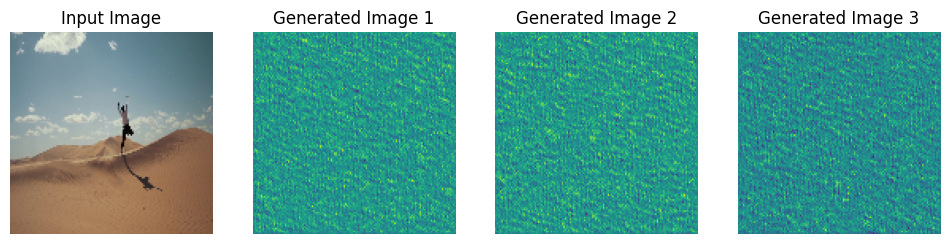

In [ ]:
generator = make_generator_model(num_frames=3, output_resolution=128)
IMG_WIDTH = 128
IMG_HEIGHT = 128
# Load and preprocess the input image
input_image = tf.io.read_file('frame_0.jpg')
input_image = tf.image.decode_jpeg(input_image, channels=3)
input_image = tf.image.resize(input_image, [IMG_HEIGHT, IMG_WIDTH])
input_image = input_image / 255.0
input_image = tf.expand_dims(input_image, axis=0)

# Generate additional images using the generator
generated_images = []
for _ in range(3):
    noise = tf.random.normal([1, latent_dim])
    generated_image = generator(noise, training=False)
    generated_images.append(generated_image)

# Concatenate and visualize the generated images
generated_images = tf.concat(generated_images, axis=0)

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].imshow(input_image[0])
axes[0].set_title('Input Image')
axes[0].axis('off')

for i in range(3):
    axes[i+1].imshow(generated_images[i])
    axes[i+1].set_title(f'Generated Image {i+1}')
    axes[i+1].axis('off')

plt.show()
